In [129]:
# CS21B2019
# Devarakonda SLR Siddesh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Data Generation

In [130]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directory containing the images
directory_path = "/kaggle/input/iris-image-dataset"

# Create an instance of ImageDataGenerator
imagegen = ImageDataGenerator()

# Load the data from the directory
data = imagegen.flow_from_directory(
    directory_path,
    target_size=(224, 224),  # Target size for resizing the images
    batch_size=32,            # Batch size for training
    class_mode='categorical', # Mode for yielding the targets: 'binary' or 'categorical'
    shuffle=True              # Whether to shuffle the data
)

Found 421 images belonging to 3 classes.


In [131]:
data.class_indices

{'iris-setosa': 0, 'iris-versicolour': 1, 'iris-virginica': 2}

### Train Test Split

In [132]:
from sklearn.model_selection import train_test_split

X = []
y = []
for i in range(len(data)):
    batch_x, batch_y = data[i]
    X.extend(batch_x)
    y.extend(batch_y)

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### CNN Model

In [133]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, InputLayer, BatchNormalization, Dropout

# build a sequential model
model = Sequential([
        InputLayer(shape=(224, 224, 3)),

        Conv2D(20, (5, 5), activation='relu', strides=(1, 1), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),

        Conv2D(40, (5, 5), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='same'),

        Conv2D(60, (3, 3), activation='relu', strides=(2, 2), padding='same'),
        MaxPool2D(pool_size=(2, 2), padding='valid'),

        Flatten(),
        Dense(units=256, activation='relu'),
        Dense(units=64, activation='relu'),
        Dense(units=3, activation='softmax')
])

model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 224, 224, 20)   │         1,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 112, 112, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 56, 56, 40)     │        20,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 28, 28, 40)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 14, 14, 60)     │        21,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 7, 7, 60)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 2940)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 256)            │       752,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 812,759 (3.10 MB)

 Trainable params: 812,759 (3.10 MB)

 Non-trainable params: 0 (0.00 B)

In [134]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [135]:
# fit on data for 20 epochs
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.4111 - loss: 28.6538

W0000 00:00:1711981284.574440      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 594ms/step - accuracy: 0.4116 - loss: 27.7293

W0000 00:00:1711981291.143212      92 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 686ms/step - accuracy: 0.4120 - loss: 26.9589 - val_accuracy: 0.6471 - val_loss: 1.5223
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5334 - loss: 1.5566 - val_accuracy: 0.5176 - val_loss: 0.9920
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5830 - loss: 1.0085 - val_accuracy: 0.6941 - val_loss: 0.8294
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6203 - loss: 0.8840 - val_accuracy: 0.6941 - val_loss: 0.8112
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6536 - loss: 0.7846 - val_accuracy: 0.6353 - val_loss: 0.8837
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7180 - loss: 0.6828 - val_accuracy: 0.5647 - val_loss: 0.9551
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8618 - loss: 0.5694 - val_accuracy: 0.5529 - val_loss: 1.0111
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8849 - loss: 0.3882 - val_accuracy: 0.5059 - val_loss: 

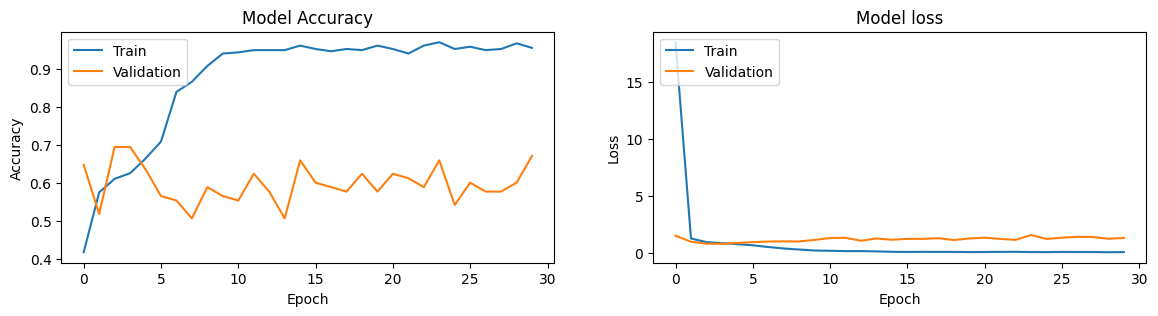

In [136]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 3))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

## Transfer Learning using VGG16 for classifying the Imagenette Dataset.

### Downloading the Weights of VGG16

In [137]:
from keras.applications import VGG16

In [138]:
# include top should be False to remove the softmax layer
pretrained_model = VGG16(include_top=False, weights='imagenet',input_shape=(224,224,3))
pretrained_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_22 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

- Generate Features from VGG16

In [139]:
from keras.utils import to_categorical
vgg_features_train = pretrained_model.predict(X_train)
vgg_features_val = pretrained_model.predict(X_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [140]:
# # OHE target column
# train_target = to_categorical(y_train)
# val_target = to_categorical(y_test)

### Classify the images using the features from VGG16

In [141]:
model_2 = Sequential([
    Flatten(input_shape=(7, 7, 512)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(3, activation='softmax'),
])

model_2.compile(
    optimizer='adam', 
    metrics=['accuracy'], 
    loss='categorical_crossentropy'
)

model_2.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_18 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 64)             │     1,605,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,606,147 (6.13 MB)

 Trainable params: 1,606,019 (6.13 MB)

 Non-trainable params: 128 (512.00 B)

In [142]:
# train model using features generated from VGG16 model
history_2 = model_2.fit(vgg_features_train, y_train, epochs=30, batch_size=128, validation_data=(vgg_features_val, y_test))

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2983 - loss: 1.6654 - val_accuracy: 0.4706 - val_loss: 64563.2852
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6083 - loss: 0.8320 - val_accuracy: 0.5412 - val_loss: 74558.0859
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7338 - loss: 0.6655 - val_accuracy: 0.5412 - val_loss: 87611.6562
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7633 - loss: 0.6296 - val_accuracy: 0.5294 - val_loss: 82976.8828
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8258 - loss: 0.5125 - val_accuracy: 0.5412 - val_loss: 85395.8516
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8493 - loss: 0.4769 - val_accuracy: 0.5294 - val_loss: 63805.2031
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8730 - loss: 0.4534 - val_accuracy: 0.5294 - val_loss: 59626.3086
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8750 - loss: 0.4517 - val_accuracy: 

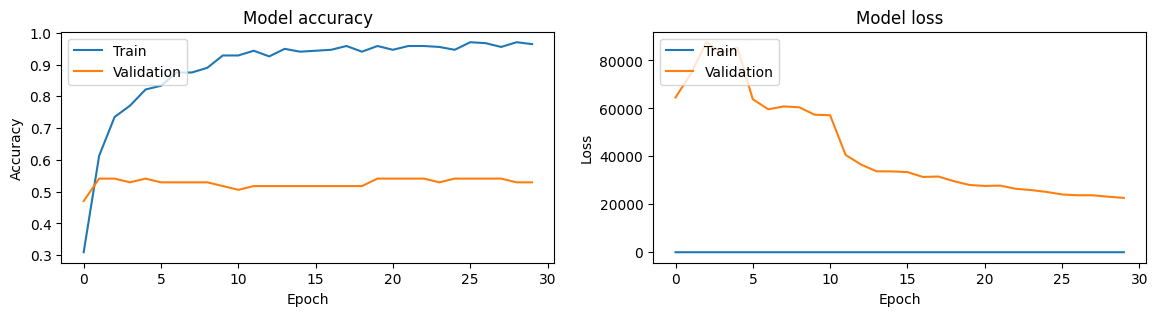

In [143]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 3))

plt.subplot(1, 2, 1)
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])  
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left') 

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])  
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')  

plt.show()

___